## Data and Objectives
In this practical you will be investigating the impact of winter heating on the levels of Particulate Matter in Beijing.  Using [this](https://www.kaggle.com/crawford/pm25-data-for-five-chinese-cities) kaggle dataset, taken from [this](http://www.stat-center.pku.edu.cn/Stat/Uploads/Files/[20151120_1009]Liang-etal-Chen-PRSA-PM2.5.pdf) paper you will be first working to understand what is in your data, and then looking to build see if there is any relation between temperature and particulate matter.

## Import Python Packages

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in Dataset
Load the .csv file into a pandas dataframe usng the appropriate pandas method.

In [55]:
fname = 'data/pm25-data-of-five-chinese-cities/BeijingPM20100101_20151231.csv'
df = pd.read_csv(fname)

## Initial look at the Data
First have a look at the first and last five rows in the data.

In [3]:
df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [4]:
df.tail()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0
52583,52584,2015,12,31,23,4,NaN,NaN,NaN,235.0,-9.0,79.0,1029.0,-6.0,NE,2.67,0.0,0.0


Now get some basic statistics about the data using the appropriate method:

In [5]:
df.describe()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,25052.000000,20508.000000,24931.000000,50387.000000,52579.000000,52245.000000,52245.000000,52579.000000,52579.000000,52100.000000,52100.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,87.239267,88.027434,88.041166,91.643772,14.222059,25.991338,10.295070,12.098527,49.281706,4381.035532,4381.036040
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,28.000000,24.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,64.000000,68.000000,62.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,124.000000,127.000000,122.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,21.020000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


Now get some information on the size and shape of the dataframe and the data types of the columns:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


## Subset and group the Dataframe

First run the piece of code below which takes the date and time columns and puts them together as one datetime object:

In [21]:
time_column_list = ['year', 'month', 'day', 'hour']
df['dt'] = pd.to_datetime(df[time_column_list])
df.drop(time_column_list, axis=1, inplace=True)

Now set the datetime as the index:

In [27]:
df.set_index('dt', inplace=True)

Now subset the dataframe so we have only data from 2014, the mask you can use to do this has been done already:

In [46]:
mask = (df.index >= "2014") & (df.index < "2015")
df_2014 = df[mask]

Now group the PM data so that we get daily averages.  The what to group over and variables to group have been defined, you need to define the grouping method (i.e. how to aggregate the daily data): 

In [48]:
what_to_group = df_2014.index.dayofyear
variables_of_interest = {'PM_Dongsi': np.mean,
                         'PM_Dongsihuan': np.mean,
                         'PM_Nongzhanguan': np.mean,
                         'PM_US Post': np.mean}

grouped_2014_df = df_2014.groupby(what_to_group).agg(variables_of_interest)
grouped_2014_df.head()

,PM_US Post,PM_Dongsihuan,PM_Nongzhanguan,PM_Dongsi
dt,,,,
1,58.416667,45.954545,49.454545,55.272727
2,167.625000,153.791667,147.666667,133.583333
3,54.458333,43.190476,45.478261,44.826087
4,154.875000,145.666667,141.083333,133.916667
5,101.416667,100.666667,95.583333,89.041667


Now make sure you have the right number of data samples (should be 365 entries!):

In [50]:
grouped_2014_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 4 columns):
PM_US Post         365 non-null float64
PM_Dongsihuan      355 non-null float64
PM_Nongzhanguan    364 non-null float64
PM_Dongsi          365 non-null float64
dtypes: float64(4)
memory usage: 14.3 KB


## Some initial data visualisation
Now for the last step, lets plot all the data to see how the PM2.5 changes at each of the stations through the year:

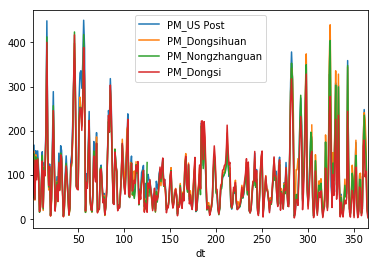

In [53]:
grouped_2014_df.plot()
plt.show()